In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [3]:
import matplotlib.pyplot as plt

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [12]:
ax1 = fig.add_subplot(1, 1, 1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


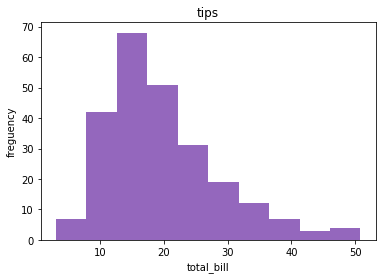

In [10]:
ax1.hist(tips["total_bill"], bins = 10)
ax1.set_title("tips")
ax1.set_ylabel("freguency")
ax1.set_xlabel("total_bill")
fig

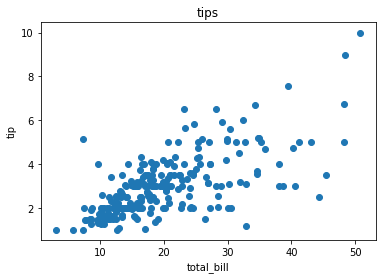

In [13]:
# 이변량 그래프 - 산점도
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_title("tips")
ax2.set_xlabel("total_bill")
ax2.set_ylabel("tip")
ax2.scatter(tips["total_bill"], tips["tip"])

Text(0.5, 1.0, 'tips')

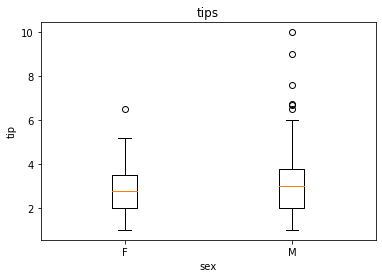

In [29]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
ax3.boxplot([tips[tips["sex"] == "Female"]["tip"], tips[tips["sex"] == "Male"]["tip"]], labels = ["F", "M"])
ax3.set_xlabel("sex")
ax3.set_ylabel("tip")
ax3.set_title("tips")

Text(0, 0.5, 'tip')

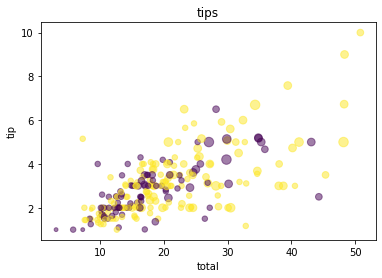

In [38]:
# 다변량

# sex -> 정수

def my_fun(x):
    if x == "Female":
        return 0
    else:
        return 1
tips["sex_col"] = tips["sex"].apply(my_fun)
tips.tail()

fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
ax4.scatter(tips["total_bill"], tips["tip"], c = tips["sex_col"], s = tips["size"]*15, alpha = 0.5)
ax4.set_title("tips")
ax4.set_xlabel("total")
ax4.set_ylabel("tip")

Text(0, 0.5, 'tip')

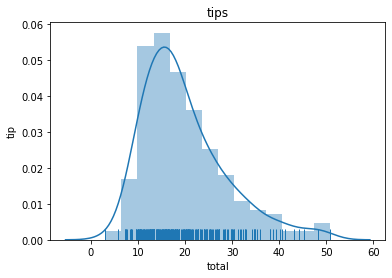

In [46]:
ax5 = plt.subplots()
ax5 = sns.distplot(tips["total_bill"], kde = True, hist = True, rug = True) # kde, hist, rug
ax5.set_title("tips")
ax5.set_xlabel("total")
ax5.set_ylabel("tip")

Text(0.5, 0, 'Day of the Week')

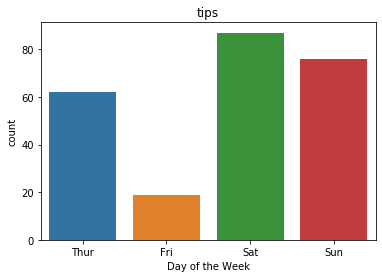

In [52]:
ax6 = plt.subplots()
ax6 = sns.countplot("day", data = tips)
ax6.set_title("tips")
ax6.set_xlabel("Day of the Week")

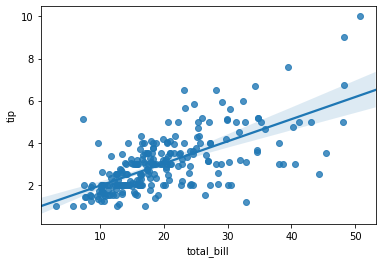

In [56]:
# seaborn 산점도
ax7 = plt.subplots()
ax7 = sns.regplot(x = "total_bill", y = "tip", data = tips, fit_reg = True)

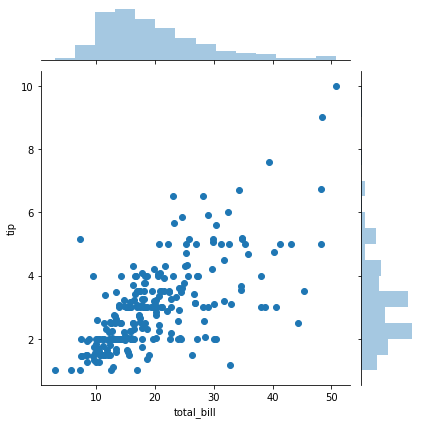

In [58]:
ax8 = sns.jointplot(x = "total_bill", y = "tip", data = tips)

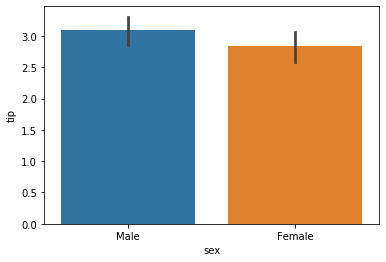

In [60]:
ax9 = sns.barplot(x = "sex", y = "tip", data = tips)

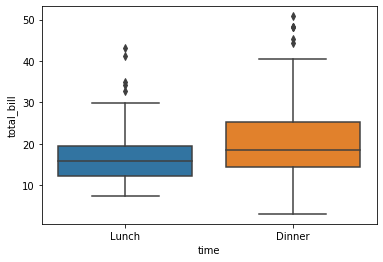

In [61]:
ax10 = sns.boxplot(x = "time", y = "total_bill", data = tips)

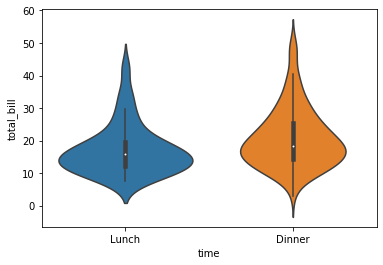

In [63]:
ax10 = sns.violinplot(x = "time", y = "total_bill", data = tips)

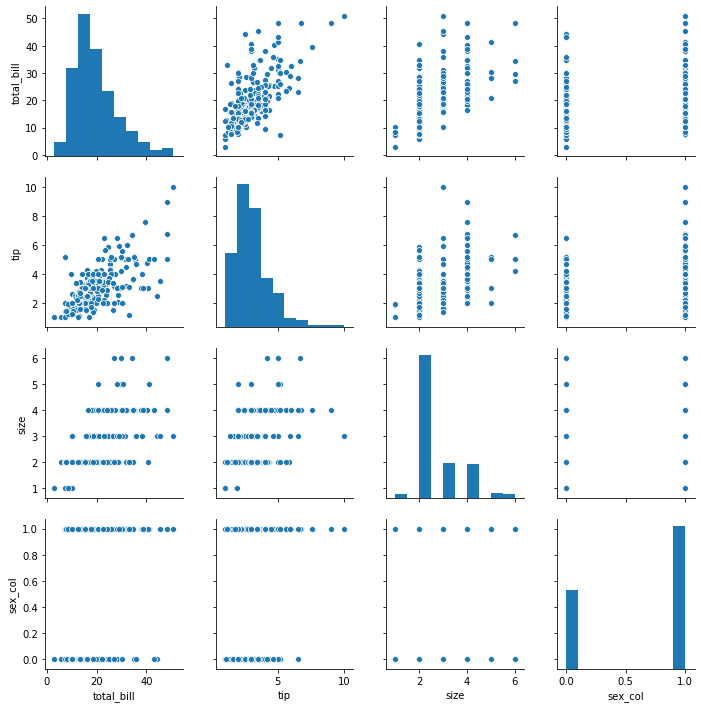

In [64]:
ax11 = sns.pairplot(tips)

In [71]:
tips2 = tips.drop(["sex_col"], axis = 1)
tips2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


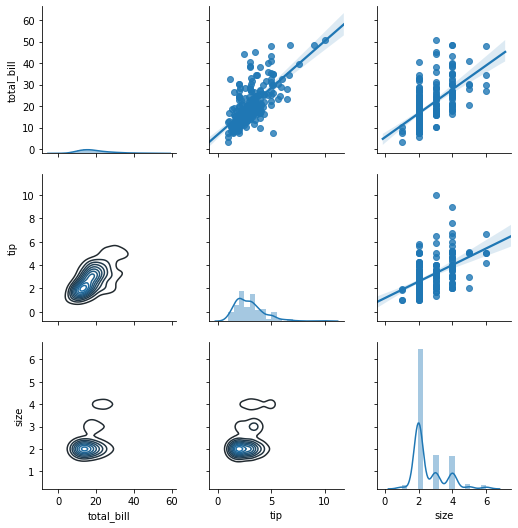

In [73]:
ax12 = sns.PairGrid(tips2)
ax12.map_lower(sns.kdeplot)
ax12.map_diag(sns.distplot)
ax12.map_upper(sns.regplot)
plt.show()